<a href="https://colab.research.google.com/github/andreavittino/colab_notebooks/blob/main/ANN_classification_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
import itertools

In [2]:
#First, we load in the data
mnist = tf.keras.datasets.mnist
(X_train,y_train), (X_test,y_test) = mnist.load_data()

In [3]:
#Then, we rescale the input data and look at the shape of the training set
X_train, X_test = X_train/255., X_test/255. 
print("The shape of X_train is: {}".format(X_train.shape))

The shape of X_train is: (60000, 28, 28)


In [4]:
#We build our classification model
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Flatten(input_shape = (28,28)),   #input layer
                                    tf.keras.layers.Dense(128,activation='relu'),     #hidden layer
                                    tf.keras.layers.Dropout(0.2), #dropout layer (for regularization)
                                    tf.keras.layers.Dense(10,activation='softmax')    #output layer
])

In [5]:
#We compile the model
model.compile(optimizer='Adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [6]:
#We train the model
r = model.fit(X_train,y_train,validation_data = (X_test,y_test), epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2951 - accuracy: 0.9137 - val_loss: 0.1438 - val_accuracy: 0.9565
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1417 - accuracy: 0.9579 - val_loss: 0.0933 - val_accuracy: 0.9728
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1056 - accuracy: 0.9677 - val_loss: 0.0826 - val_accuracy: 0.9744
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0878 - accuracy: 0.9730 - val_loss: 0.0742 - val_accuracy: 0.9778
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0746 - accuracy: 0.9765 - val_loss: 0.0752 - val_accuracy: 0.9767
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0629 - accuracy: 0.9804 - val_loss: 0.0767 - val_accuracy: 0.9784
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0569 - accuracy: 0.9812 - val_loss: 0.0688 - val_accuracy:

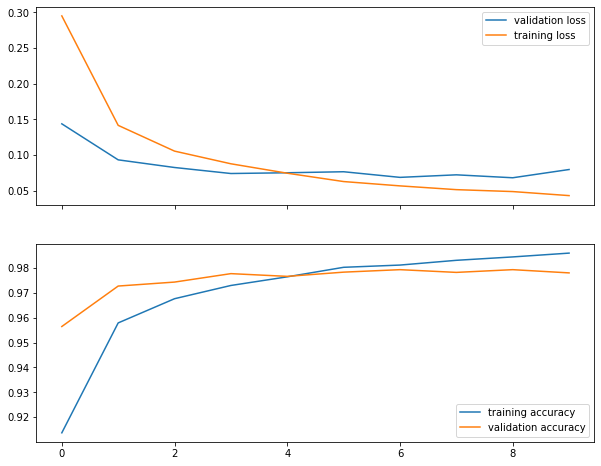

In [7]:
fig, ax = plt.subplots(nrows=2,ncols=1,figsize=(10,8),sharex=True)
ax[0].plot(r.history['val_loss'], label = 'validation loss')
ax[0].plot(r.history['loss'], label = 'training loss')
ax[0].legend()
ax[1].plot(r.history['accuracy'],label = 'training accuracy')
ax[1].plot(r.history['val_accuracy'],label = 'validation accuracy')
ax[1].legend()

In [8]:
#We evaluate the model
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0798 - accuracy: 0.9781


[0.07980229705572128, 0.9781000018119812]

Confusion matrix, without normalization
[[ 967    0    1    2    1    2    3    0    3    1]
 [   0 1129    1    1    0    1    2    0    1    0]
 [   5    2  995   17    1    0    3    4    5    0]
 [   0    0    0 1001    0    3    0    2    3    1]
 [   1    0    1    1  964    0    6    1    0    8]
 [   2    0    0   25    1  857    3    0    3    1]
 [   2    3    0    0    3    6  942    0    2    0]
 [   1    5    6    5    2    0    0  999    1    9]
 [   5    1    1    8    3    5    1    5  942    3]
 [   1    2    0   11    6    2    0    2    0  985]]


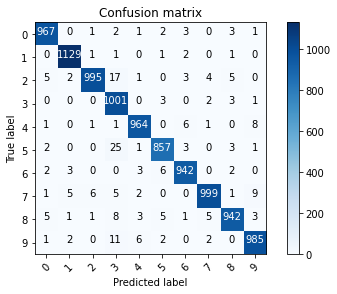

In [9]:
#We build the confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(X_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))